In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns 
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from datetime import datetime
import statsmodels.formula.api as sm

In [2]:
#import data set
train_data = pd.read_csv("C:/Users/anjum/Desktop/New Folder/train.csv")

In [3]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Describe dataset
train_data.describe() 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# B. Data Preprocessing

In [5]:
#check Null values
train_data.isnull().values.any()

False

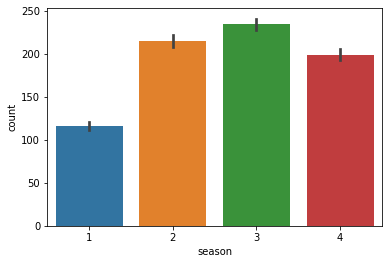

In [6]:
# Data Exploration
sns.barplot(x='season', y='count', data=train_data)

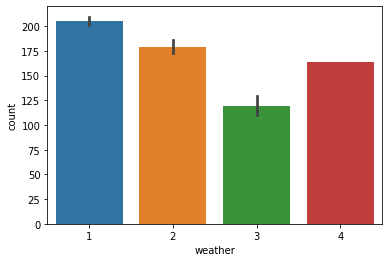

In [7]:
sns.barplot(x='weather', y='count', data=train_data)

In [8]:
train_data[['count', 'holiday']].groupby(['holiday'], as_index = True).mean().sort_values(by = 'count')

,count
holiday,
1,185.877814
0,191.741655


In [9]:
train_data[['count', 'season']].groupby(['season'], as_index = True).mean().sort_values(by = 'count')

,count
season,
1,116.343261
4,198.988296
2,215.251372
3,234.417124


In [10]:
#we have a datetime object here, so it's better to break them into hour, day, month, year and make them a separate column.
train_data["hour"] = [t.hour for t in pd.DatetimeIndex(train_data.datetime)]
train_data["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_data.datetime)]
train_data["month"] = [t.month for t in pd.DatetimeIndex(train_data.datetime)]
train_data['year'] = [t.year for t in pd.DatetimeIndex(train_data.datetime)]

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

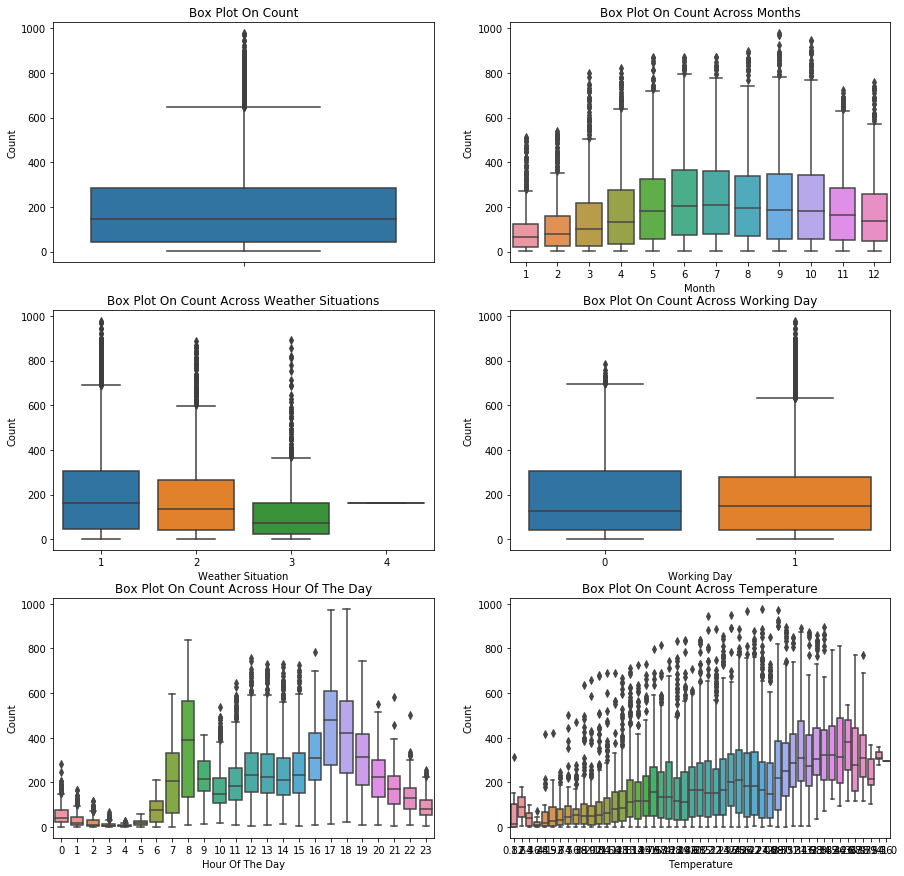

In [11]:
#Box plot
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=train_data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train_data,y="count",x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=train_data,y="count",x="weather",orient="v",ax=axes[1][0])
sns.boxplot(data=train_data,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train_data,y="count",x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=train_data,y="count",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

In [12]:
# Dropping datetime column becuase we already break them and created new columns
train_data.drop('datetime',axis=1,inplace=True) 
 

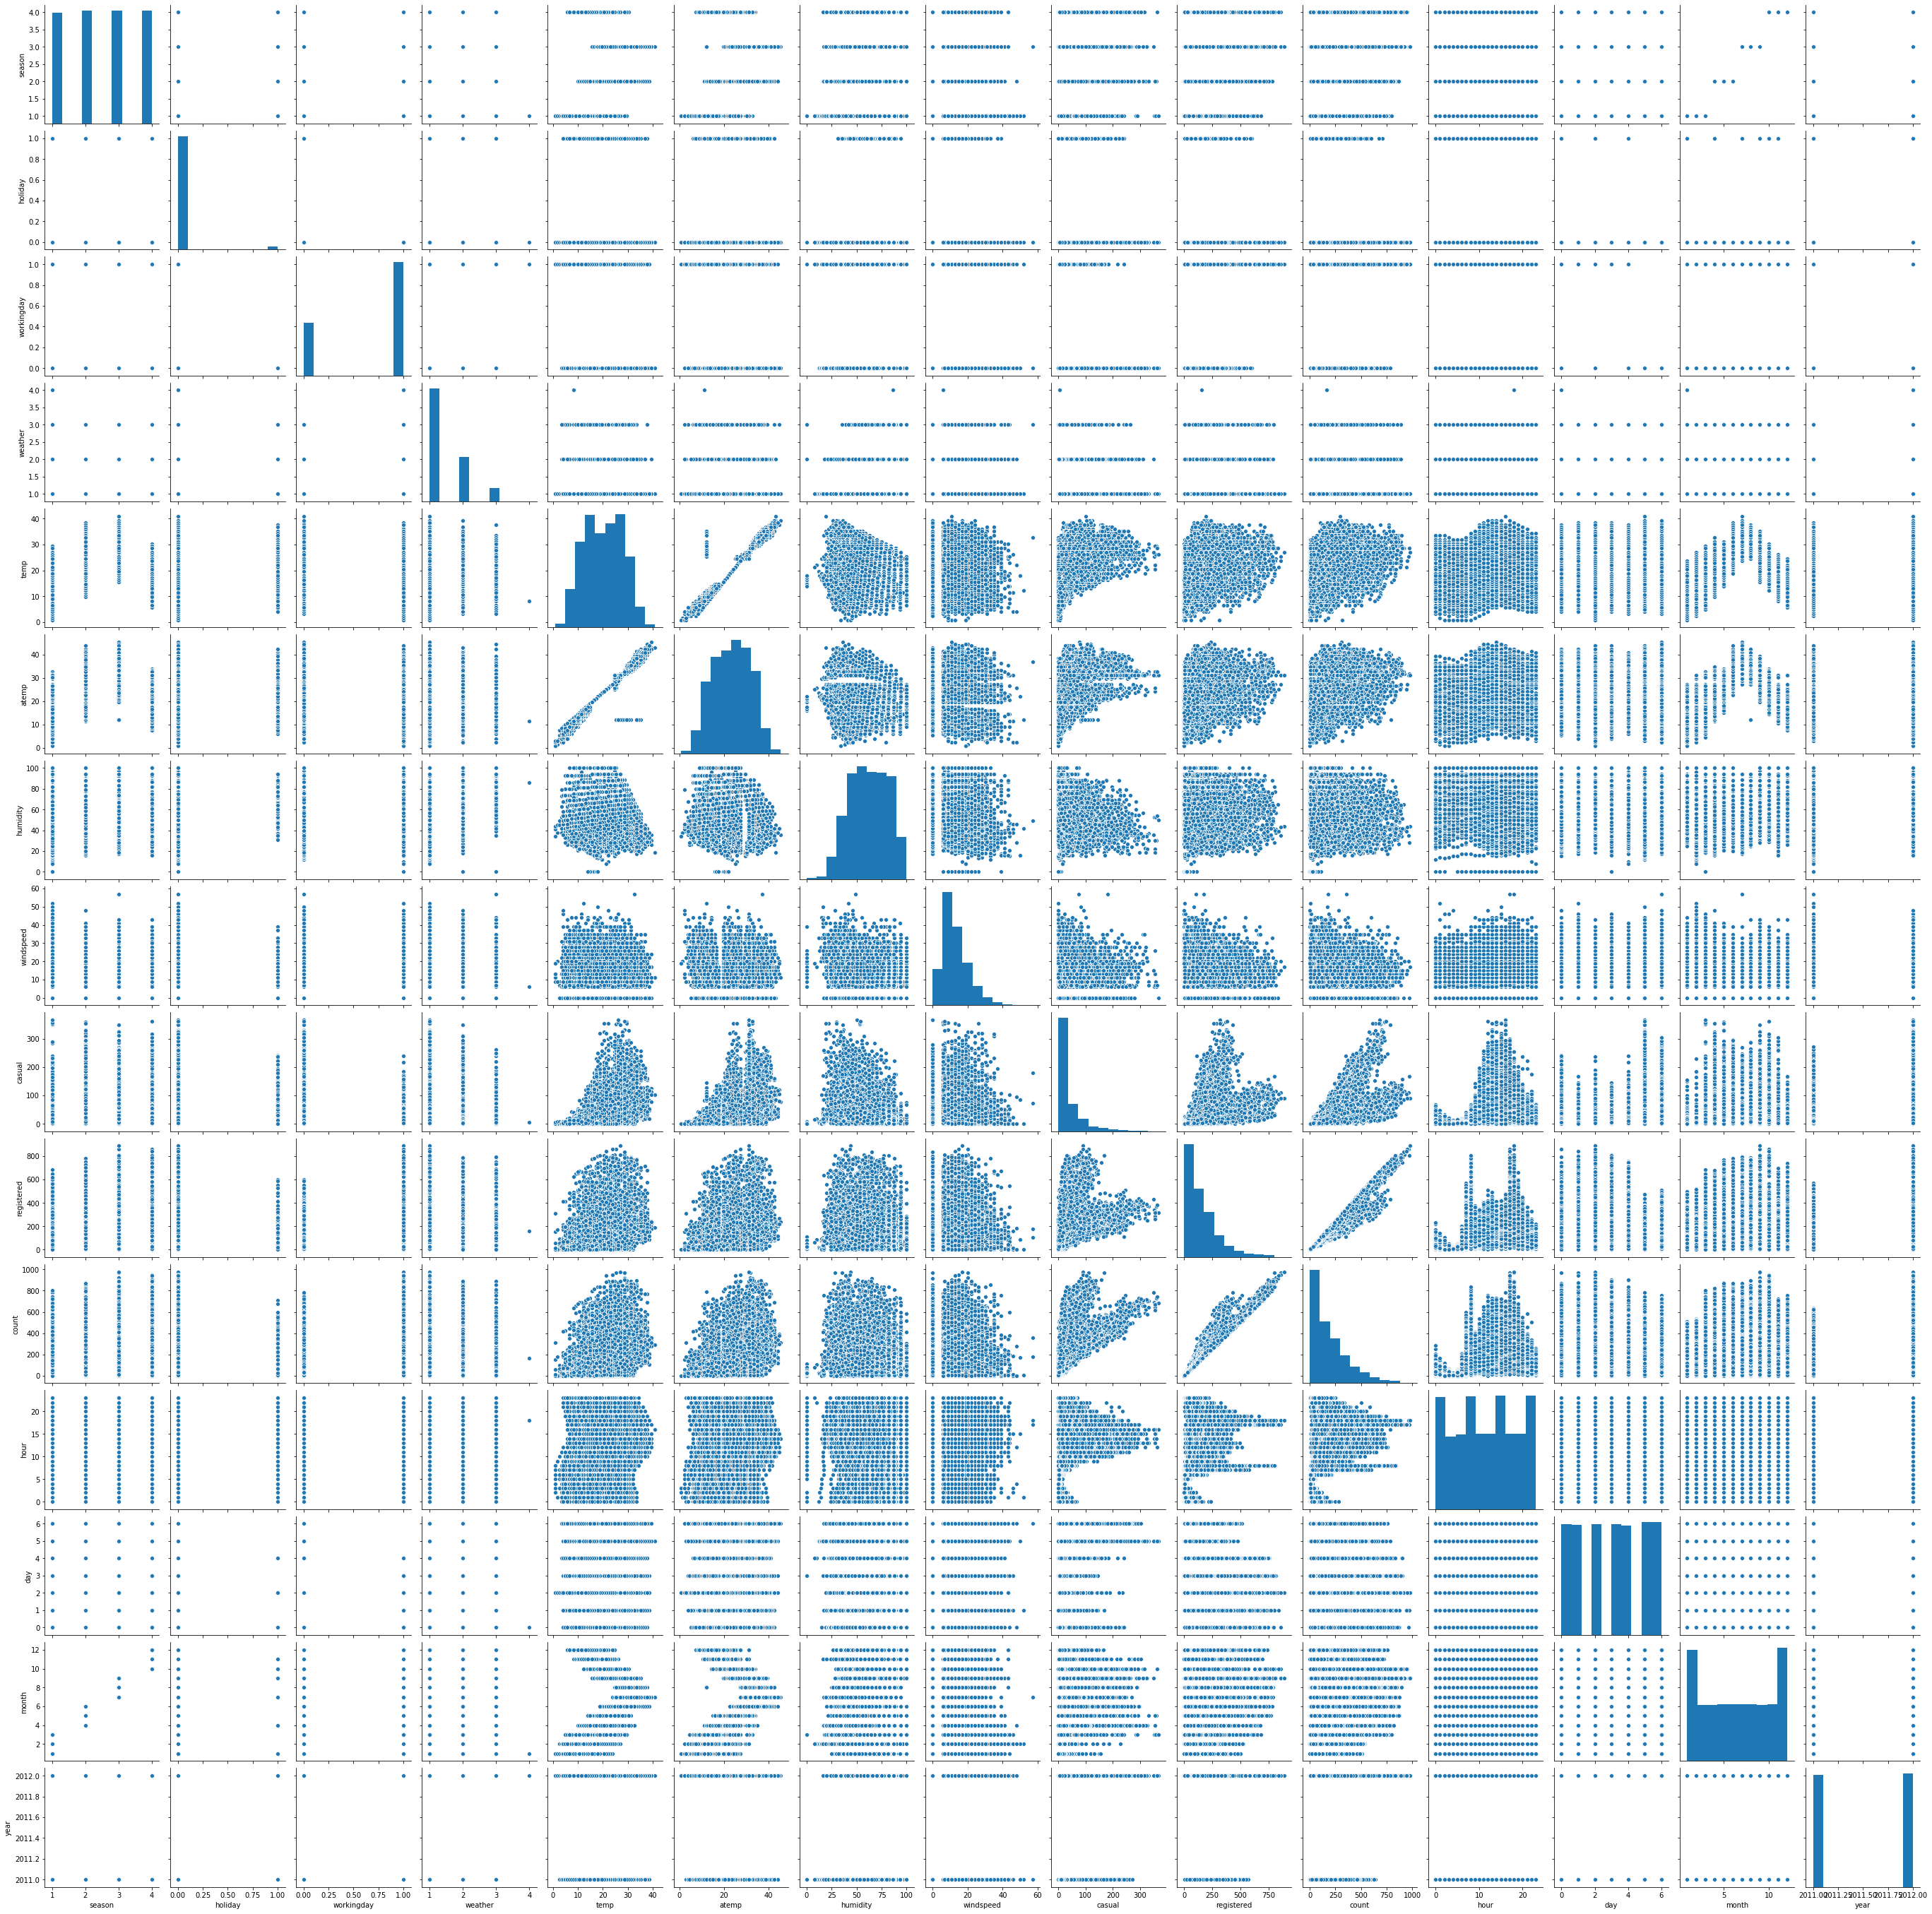

In [13]:
# correlation by pairplot
sns.pairplot(train_data)

In [14]:
# Dropping holiday column as it is highly correlated to‘workingday’ column
train_data.drop('holiday',axis=1,inplace=True) 
 

In [15]:
# Dropping atemp column as it is highly correlated to ‘temp’ column
train_data.drop('atemp',axis=1) 

,season,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,1,9.84,81,0.0000,3,13,16,0,5,1,2011
1,1,0,1,9.02,80,0.0000,8,32,40,1,5,1,2011
2,1,0,1,9.02,80,0.0000,5,27,32,2,5,1,2011
3,1,0,1,9.84,75,0.0000,3,10,13,3,5,1,2011
4,1,0,1,9.84,75,0.0000,0,1,1,4,5,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,50,26.0027,7,329,336,19,2,12,2012
10882,4,1,1,14.76,57,15.0013,10,231,241,20,2,12,2012
10883,4,1,1,13.94,61,15.0013,4,164,168,21,2,12,2012
10884,4,1,1,13.94,61,6.0032,12,117,129,22,2,12,2012


In [16]:
# there are just 2 different years 2011,2012 so using map(), I converted 2011 and 2012 to 0 and 1 respectively.
train_data['year'] = train_data['year'].map({2011:0, 2012:1})


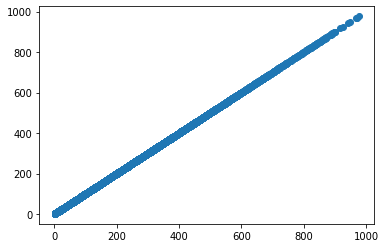

In [17]:
# finding the correlation between the columns 'casual','registred','count'

plt.scatter(x = train_data['casual'] + train_data['registered'], y = train_data['count'])
plt.show()

In [18]:
# Dropping the column registred and casual
train_data = train_data.drop(['registered', 'casual'],axis=1)

# Applying Machine Learning Models

In [19]:
X, y = train_data.iloc[:, :], train_data['count']

In [20]:
X = X.drop('count',axis=1)

In [21]:
#Normalize the train set
#def norm_func(i):
    #x = (i-i.min())	/ (i.max()-i.min())
    #return (x)
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()

In [22]:
#X = scl.fit_transform(X)
#y = scl.fit_transform(y)

In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [25]:
print(X_train.shape)
print(X_test.shape)

(8708, 11)
(2178, 11)


In [26]:
print(y_train.shape)
print(y_test.shape)

(8708,)
(2178,)


# C. Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
reg5 = Ridge(alpha=0.05, normalize=True)
reg5.fit(X_train,y_train)
reg5.score(X_train,y_train)

0.3870352194679698

In [28]:
Ridge = reg5.predict(X_test)
Ridge

array([307.5578188 , 244.26986027, 242.62523736, ..., 425.99974566,
       248.34425754,  17.61129284])

In [29]:
print(reg5.intercept_)
print(reg5.coef_)

190.85553514010104
[  4.96219692   2.25997007  -4.34529748  24.00460613  27.63079751
 -37.30152397   3.68258868  52.24894685   1.52110785  20.80115593
  38.50322045]


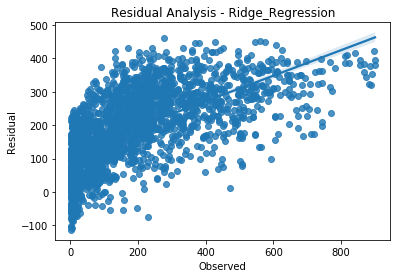

In [30]:
sns.regplot(y_test,Ridge)
plt.title('Residual Analysis - Ridge_Regression')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

In [31]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test,Ridge))
print('MSE:', metrics.mean_squared_error(y_test, Ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Ridge)))

MAE: 106.21982846292111
MSE: 20185.437271498104
RMSE: 142.07546329855168


In [32]:
# grid search hyperparameters for ridge regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge


In [33]:
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -20075.472
Config: {'alpha': 0.99}


# D. Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
reg6 = Lasso(alpha=0.3, normalize=True)
reg6.fit(X_train,y_train)
reg6.score(X_train,y_train)

0.2922459706368137

In [35]:
Lasso = reg6.predict(X_test)
Lasso

array([274.66980491, 236.24995926, 227.76260648, ..., 333.18315773,
       226.155967  ,  67.56182284])

In [36]:
print(reg6.intercept_)
print(reg6.coef_)

190.85553514010107
[  0.           0.          -0.          30.36512919   6.07116505
 -16.062155     0.          35.02542875  -0.           0.
  14.46225659]


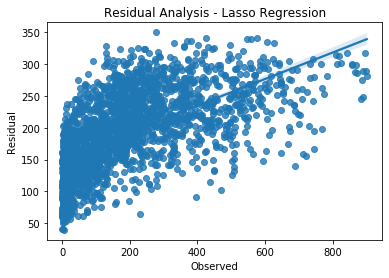

In [37]:
sns.regplot(y_test,Lasso)
plt.title('Residual Analysis - Lasso Regression')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

In [38]:
print("MAE:", metrics.mean_absolute_error(y_test,Lasso))
print('MSE:', metrics.mean_squared_error(y_test, Lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Lasso)))

MAE: 115.07532691507818
MSE: 23335.853505115298
RMSE: 152.76077214100255


In [39]:
# 10 fold CV
from sklearn.linear_model import LassoCV
## define model evaluation method
cv = RepeatedKFold(n_splits=10, random_state=1)
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77696033.02471194, tolerance: 25650.216841163714
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77364353.57555279, tolerance: 25439.435778971543
  tol, rng, random, posi

C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77734608.02528119, tolerance: 25344.05119792039
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78696410.0110794, tolerance: 25802.32731535026
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positiv

C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77371217.6125775, tolerance: 25378.021447262985
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78910169.06225008, tolerance: 25757.25662806839
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positi

C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78543501.7049124, tolerance: 25696.314448258265
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78297649.09623688, tolerance: 25603.923184432824
  tol, rng, random, posit

C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78134870.30501921, tolerance: 25717.81188003317
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77880519.65055531, tolerance: 25431.700984432817
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posit

alpha: 0.000000


C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77801610.82247181, tolerance: 25421.888988311854
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78084492.53777677, tolerance: 25528.55891815514
  tol, rng, random, positive)
C:\Users\anjum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posit

# E. Regression Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg4 = DecisionTreeRegressor()
reg4.fit(X_train,y_train)
reg4.score(X_train,y_train)

0.9999979686397749

In [41]:
Dec_Tree = reg4.predict(X_test)
Dec_Tree

array([243., 224., 205., ..., 747., 470.,  83.])

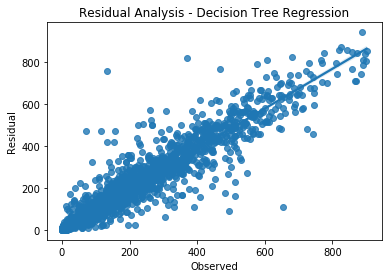

In [42]:
sns.regplot(y_test,Dec_Tree)
plt.title('Residual Analysis - Decision Tree Regression')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

In [43]:
print("MAE:", metrics.mean_absolute_error(y_test,Dec_Tree ))
print('MSE:', metrics.mean_squared_error(y_test, Dec_Tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Dec_Tree)))

MAE: 35.1643709825528
MSE: 3730.2692837465565
RMSE: 61.075930477943245


In [44]:
# 10 Fold
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(reg4, parameters,scoring='neg_mean_squared_error', cv=10)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

-3400.815237664531 {'max_depth': 13}


# F.Decision Tree  with Pruning

In [45]:
# Pruning the Tree
from sklearn.metrics import mean_squared_error, r2_score
# Minimum observations at the internal node approach
regtree2 = DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
# Prediction
test_pred2 = regtree2.predict(X_test)
train_pred2 = regtree2.predict(X_train)

In [47]:
# Error on test dataset
mean_squared_error(y_test, test_pred2)
r2_score(y_test, test_pred2)

0.8879307229151018

In [48]:
# Error on train dataset
mean_squared_error(y_train, train_pred2)
r2_score(y_train, train_pred2)

0.9971779104219468

In [49]:
## Minimum observations at the leaf node approach
regtree3 = DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(X_train, y_train)

# Prediction
test_pred3 = regtree3.predict(X_test)
train_pred3 = regtree3.predict(X_train)

# measure of error on test dataset
mean_squared_error(y_test, test_pred3)
r2_score(y_test, test_pred3)

# measure of error on train dataset
mean_squared_error(y_train, train_pred3)
r2_score(y_train, train_pred3)

0.9776577664876074

In [50]:
# 10 Fold DT pruning with leaf node apporoach
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(regtree3, parameters,scoring='neg_mean_squared_error' ,cv=10)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

-2912.6885071724755 {'max_depth': 15}


In [51]:
# 10 Fold DT pruning internal node approach
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(regtree2, parameters,scoring='neg_mean_squared_error', cv=10)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

-3266.54357273603 {'max_depth': 13}


# G. Random Forest

In [52]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


In [53]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.149
RMSLE test: 0.336
R2 train: 0.993
R2 test: 0.945


In [54]:
#model = RandomForestClassifier()
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# evaluate the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(forest, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MSE: -1692.869 (220.771)


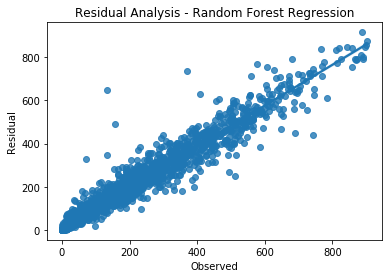

In [55]:
sns.regplot(y_test,y_test_pred)
plt.title('Residual Analysis - Random Forest Regression')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

The best result given by Random Forest across  A-H. 

# H. Gradient Boosting

In [56]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
model1 = GradientBoostingRegressor()

In [58]:
# fit the model on the whole dataset
model1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model1, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MSE: -4439.244 (320.847)


# I. Optimal Model

Random Forest with 10 fold cross validation was giving the least error and high accuracy across all the models from A-H

Similar apporach within train and validation can be apply to the given test data

In [60]:
test_data = pd.read_csv("C:/Users/anjum/Desktop/New Folder/test.csv")

In [61]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [62]:
test_data.isnull().values.any()  # checking missing entries

False

similarly converting datetime to hour , month and year 

In [63]:
test_data["hour"] = [t.hour for t in pd.DatetimeIndex(test_data.datetime)]
test_data["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_data.datetime)]
test_data["month"] = [t.month for t in pd.DatetimeIndex(test_data.datetime)]
test_data['year'] = [t.year for t in pd.DatetimeIndex(test_data.datetime)]
test_data['year'] = test_data['year'].map({2011:0, 2012:1})

In [64]:
test_data =test_data.drop('atemp',axis=1) 


In [65]:
X_test=test_data.iloc[:,1:]

In [66]:
X_test = scl.transform(X_test)

In [67]:
y_test=forest.predict(X_test) # Random Forest 

In [68]:
y_test

array([ 18.365 ,  20.8625,  15.56  , ..., 117.745 ,  90.535 ,  64.665 ])

In [69]:
y_test = pd.DataFrame(y_test)

In [70]:
df_final = test_data


In [71]:
df_final['count'] = np.round(y_test)

In [72]:
df_final = df_final.drop(['season', 'workingday','weather', 'holiday',
                            'temp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year'], axis=1)

In [74]:
df_final.head()

,datetime,count
0,2011-01-20 00:00:00,18.0
1,2011-01-20 01:00:00,21.0
2,2011-01-20 02:00:00,16.0
3,2011-01-20 03:00:00,5.0
4,2011-01-20 04:00:00,3.0


In [75]:
df_final.to_csv('bike2_submission.csv', index=False)
